<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Linear Regression with Sacramento Real Estate Data

_Authors: Matt Brems, Sam Stack_

---

In this lab you will hone your EDA skills and practice constructing simple linear regressions using a dataset on Sacramento real estate sales.  The dataset contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

In [5]:
sac_csv = '/Users/natimarcus/Desktop/DAT-06-24/class material/Unit 3/data/sacramento_real_estate_transactions.csv'

In [33]:
data = pd.read_csv(sac_csv, index_col ='sale_date')

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

%matplotlib inline

In [13]:
from sklearn.linear_model import LinearRegression

In [37]:
data.rename(columns={'sq__ft':'sq_ft'}, inplace=True)

### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** These EDA checks should be done on every data set we give you. If you find yourself checking for, say, missing/corrupted data over and over, it might be to your long-term benefit to have a function that you can re-use every time you're given some new data.

In [38]:
data.head()

,beds,baths,sq_ft,price
sale_date,,,,
Wed May 21 00:00:00 EDT 2008,2,1,836,59222
Wed May 21 00:00:00 EDT 2008,3,1,1167,68212
Wed May 21 00:00:00 EDT 2008,2,1,796,68880
Wed May 21 00:00:00 EDT 2008,2,1,852,69307
Wed May 21 00:00:00 EDT 2008,2,1,797,81900


In [41]:
data.corr()

,beds,baths,sq_ft,price
beds,1.000000,0.839650,0.684999,0.344752
baths,0.839650,1.000000,0.665326,0.416718
sq_ft,0.684999,0.665326,1.000000,0.339628
price,0.344752,0.416718,0.339628,1.000000


In [39]:
x_cols = ['beds','baths','sq_ft']

In [40]:
x = data[x_cols]
y = data.price

lr = LinearRegression()
lr.fit(x,y)

print(lr.intercept_)
print(lr.coef_)

120538.95054889735
[-7.70086275e+03  6.09157098e+04  2.08493711e+01]


In [43]:
lr.score(x,y)

0.18203162472419276

In [44]:
x_std = (x - x.mean())/x.std()

In [45]:
x_std.describe()

,beds,baths,sq_ft
count,9.850000e+02,9.850000e+02,9.850000e+02
mean,6.572999e-16,6.989897e-16,2.123583e-16
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.226167e+00,-1.984260e+00,-2.682930e+00
25%,-6.970354e-01,-8.674051e-01,-4.239095e-01
50%,6.753016e-02,2.494498e-01,-1.041764e-02
75%,8.320958e-01,2.494498e-01,4.731576e-01
max,3.890358e+00,3.600015e+00,5.266860e+00


In [46]:
lr.fit(x_std,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
lr.score(x_std,y)

0.18203162472419276

In [48]:
lr.coef_

array([-10072.20660484,  54542.18571659,  17849.63081076])

In [49]:
lr.intercept_

233715.95126903552

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in a LR model. 

**For each of these variables you believe to be valid potential predictors in an LR model, generate a plot showing the relationship between the independent variable and dependent variable.**

In [50]:
data['prediction'] = lr.predict(x_std)

In [51]:
lr.predict(x_std)

array([183483.00908041, 182683.28816523, 182649.03423636, 183816.59901803,
       182669.88360747, 181745.06646567, 242285.48757626, 182891.78187624,
       246587.90283644, 243161.16116251, 238219.86021153, 246142.62122997,
       191913.59981862, 179618.43061336, 248276.70189563, 250611.83145896,
       183649.80404922, 182628.18486526, 178312.36504732, 247539.52909375,
       242577.37877168, 239275.73332435, 237420.13929635, 252647.62501354,
       238053.06524272, 241951.89763864, 178430.01646059, 242598.22814278,
       240339.05125051, 245287.79701483, 248631.14120435, 243286.25738912,
       248039.91400018, 242535.68002947, 248631.14120435, 248832.19010202,
       241826.80141203, 242257.19339182, 235460.29841284, 189599.31962639,
       254156.22454616, 244432.97279968, 241284.7177634 , 248714.53868876,
       244654.87106845, 174002.5049738 , 244508.92547074, 191411.72984327,
       246093.47767443, 250062.30299699, 244036.83474876, 244717.41918176,
       249770.41180158, 2

In [52]:
data['residuals'] = data.price - data.prediction

In [53]:
data.head()

,beds,baths,sq_ft,price,prediction,residuals
sale_date,,,,,,
Wed May 21 00:00:00 EDT 2008,2,1,836,59222,183483.009080,-124261.009080
Wed May 21 00:00:00 EDT 2008,3,1,1167,68212,182683.288165,-114471.288165
Wed May 21 00:00:00 EDT 2008,2,1,796,68880,182649.034236,-113769.034236
Wed May 21 00:00:00 EDT 2008,2,1,852,69307,183816.599018,-114509.599018
Wed May 21 00:00:00 EDT 2008,2,1,797,81900,182669.883607,-100769.883607


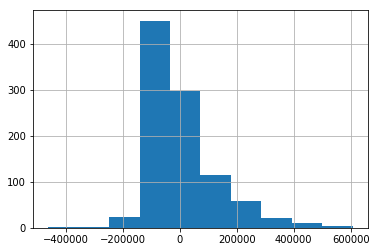

In [55]:
data.residuals.hist();

In [56]:
data.residuals.describe()

count    9.850000e+02
mean     3.329951e-11
std      1.257942e+05
min     -4.604842e+05
25%     -8.759420e+04
50%     -2.883219e+04
75%      5.023308e+04
max      6.065174e+05
Name: residuals, dtype: float64

### 4. Which variable would be the best predictor of Y in an LR model? Why?

In [5]:
# A:

### 5. Build a function that will take in two lists `Y` and `X` and returns the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [6]:
# A:

### 6. Interpret the intercept. Interpret the slope.

In [7]:
# A:

### 7. Give an example of how this model could be used for prediction and how this model could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

In [8]:
# A:

### 8: [Bonus] Using the model you came up with in Problem 5, calculate and plot the residuals.

In [9]:
# A:

### Calculate the r-squared value, as well as the rmse, either by hand or through sklearn